## 1. 用cifar10 資料建立模型

In [1]:
import keras
from keras.datasets import cifar10
import numpy as np
np.random.seed(10)

Using TensorFlow backend.


In [2]:
(x_img_train, y_label_train), (x_img_test, y_label_test) = cifar10.load_data()

In [3]:
print("train data :", "images :", x_img_train.shape, "labels :", y_label_train.shape)
print(" test data :", "images :", x_img_test.shape, "labels :", y_label_test.shape)

train data : images : (50000, 32, 32, 3) labels : (50000, 1)
 test data : images : (10000, 32, 32, 3) labels : (10000, 1)


In [4]:
x_img_train_normalize = x_img_train.astype('float32')/255.0
x_img_test_normalize = x_img_test.astype('float32')/255.0

In [5]:
from keras.utils import np_utils
y_label_train_OneHot = np_utils.to_categorical(y_label_train)
y_label_test_OneHot = np_utils.to_categorical(y_label_test)
y_label_test_OneHot.shape

(10000, 10)

In [6]:
from keras.models import Model, Sequential
from keras.layers import Activation, Dense, Dropout, Flatten, Conv2D, MaxPooling2D, ZeroPadding2D

In [7]:
model = Sequential()

In [8]:
# 建立卷積層 1 與池化層 1
model.add(Conv2D(filters=32,
                 kernel_size=(3,3),
                 input_shape=(32, 32,3), 
                 activation='relu', 
                 padding='same'))
model.add(Dropout(0.25))
model.add(MaxPooling2D(pool_size=(2, 2)))

In [9]:
# 建立卷積層 2 與池化層 2
model.add(Conv2D(filters=64, 
                 kernel_size=(3, 3), 
                 activation='relu', 
                 padding='same'))
model.add(Dropout(0.25))
model.add(MaxPooling2D(pool_size=(2, 2)))

In [10]:
# 建立平坦層
model.add(Flatten())
model.add(Dropout(0.25))

In [11]:
# 建立隱藏層
model.add(Dense(1024, activation='relu'))
model.add(Dropout(0.25))

In [12]:
# 建立輸出層
model.add(Dense(10, activation='softmax'))

In [13]:
print(model.summary())

Model: "sequential_1"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_1 (Conv2D)            (None, 32, 32, 32)        896       
_________________________________________________________________
dropout_1 (Dropout)          (None, 32, 32, 32)        0         
_________________________________________________________________
max_pooling2d_1 (MaxPooling2 (None, 16, 16, 32)        0         
_________________________________________________________________
conv2d_2 (Conv2D)            (None, 16, 16, 64)        18496     
_________________________________________________________________
dropout_2 (Dropout)          (None, 16, 16, 64)        0         
_________________________________________________________________
max_pooling2d_2 (MaxPooling2 (None, 8, 8, 64)          0         
_________________________________________________________________
flatten_1 (Flatten)          (None, 4096)             

In [14]:
try:
    model.load_weights("SaveModel/cifarCnnModel.h5")
    print("載入模型成功!繼續訓練模型")
except :    
    print("載入模型失敗!開始訓練一個新模型")

載入模型失敗!開始訓練一個新模型


### 作業:
### 請分別選用 "binary _crossentropy", "MSE",  查看Train/test accurancy and loss rate

In [15]:
model.compile(loss='binary_crossentropy', 
              optimizer='adam', 
              metrics=['accuracy'])
train_history=model.fit(x_img_train_normalize, y_label_train_OneHot,
                        validation_split=0.2,
                        epochs=10, batch_size=20, verbose=1) 

Train on 40000 samples, validate on 10000 samples
Epoch 1/10
40000/40000 [==============================] - 123s 3ms/step - loss: 0.2185 - accuracy: 0.9160 - val_loss: 0.2095 - val_accuracy: 0.9198
Epoch 2/10
40000/40000 [==============================] - 137s 3ms/step - loss: 0.1745 - accuracy: 0.9316 - val_loss: 0.1624 - val_accuracy: 0.9362
Epoch 3/10
40000/40000 [==============================] - 143s 4ms/step - loss: 0.1530 - accuracy: 0.9396 - val_loss: 0.1526 - val_accuracy: 0.9407
Epoch 4/10
40000/40000 [==============================] - 148s 4ms/step - loss: 0.1367 - accuracy: 0.9464 - val_loss: 0.1480 - val_accuracy: 0.9421
Epoch 5/10
40000/40000 [==============================] - 147s 4ms/step - loss: 0.1225 - accuracy: 0.9524 - val_loss: 0.1421 - val_accuracy: 0.9451
Epoch 6/10
40000/40000 [==============================] - 150s 4ms/step - loss: 0.1101 - accuracy: 0.9571 - val_loss: 0.1370 - val_accuracy: 0.9470
Epoch 7/10
40000/40000 [==============================] - 150s

In [16]:
import matplotlib.pyplot as plt
%matplotlib inline

#定義一個繪圖函數
import matplotlib.pyplot as plt
def show_train_history(train_history, train, validation) :
    plt.plot(train_history.history[train])
    plt.plot(train_history.history[validation])
    plt.title('Train History')
    plt.ylabel(train)
    plt.xlabel('Epoch')
    plt.legend(['train', 'validation'], loc = 'upper left')
    plt.show()

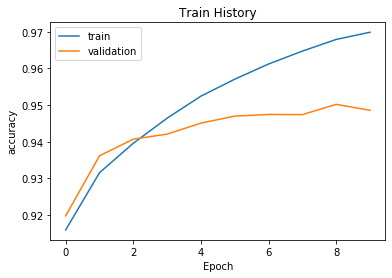

In [17]:
show_train_history(train_history, 'accuracy','val_accuracy')

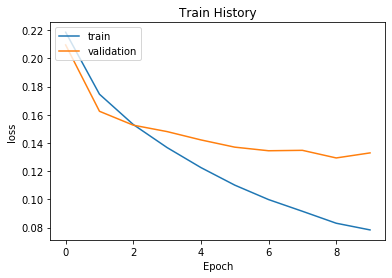

In [18]:
show_train_history(train_history, 'loss', 'val_loss')

In [19]:
model.compile(loss='MSE', 
              optimizer='adam', 
              metrics=['accuracy'])
train_history=model.fit(x_img_train_normalize, y_label_train_OneHot,
                        validation_split=0.2,
                        epochs=10, batch_size=20, verbose=1) 

Train on 40000 samples, validate on 10000 samples
Epoch 1/10
40000/40000 [==============================] - 120s 3ms/step - loss: 0.0217 - accuracy: 0.8505 - val_loss: 0.0386 - val_accuracy: 0.7257
Epoch 2/10
40000/40000 [==============================] - 138s 3ms/step - loss: 0.0215 - accuracy: 0.8521 - val_loss: 0.0393 - val_accuracy: 0.7205
Epoch 3/10
40000/40000 [==============================] - 154s 4ms/step - loss: 0.0209 - accuracy: 0.8578 - val_loss: 0.0390 - val_accuracy: 0.7260
Epoch 4/10
40000/40000 [==============================] - 167s 4ms/step - loss: 0.0201 - accuracy: 0.8649 - val_loss: 0.0393 - val_accuracy: 0.7200
Epoch 5/10
40000/40000 [==============================] - 135s 3ms/step - loss: 0.0198 - accuracy: 0.8673 - val_loss: 0.0404 - val_accuracy: 0.7241
Epoch 6/10
40000/40000 [==============================] - 122s 3ms/step - loss: 0.0195 - accuracy: 0.8709 - val_loss: 0.0401 - val_accuracy: 0.7246
Epoch 7/10
40000/40000 [==============================] - 120s

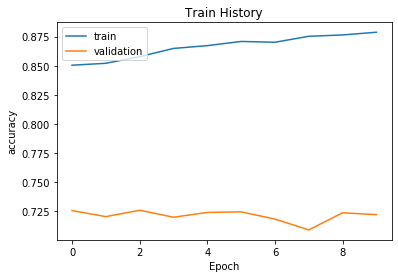

In [20]:
show_train_history(train_history, 'accuracy','val_accuracy')

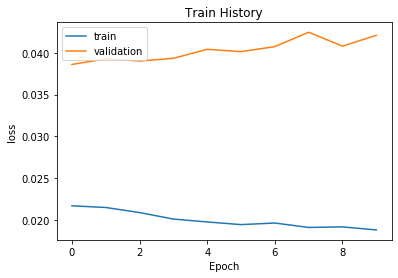

In [21]:
show_train_history(train_history, 'loss', 'val_loss')

### 結論 : 以binary_crossentropy及MSE做為損失函數來比較, 不論optimizer是adam還是sgd, binary_crossentropy都有較高的準確度.

## 2. 使用Cifar100 資料

In [22]:
import keras
from keras.datasets import cifar100
import numpy as np
np.random.seed(100)

(x_img_train, y_label_train), (x_img_test, y_label_test) = cifar100.load_data()
x_img_train_normalize = x_img_train.astype('float32')/255.0
x_img_test_normalize = x_img_test.astype('float32')/255.0

from keras.utils import np_utils
y_label_train_OneHot = np_utils.to_categorical(y_label_train)
y_label_test_OneHot = np_utils.to_categorical(y_label_test)

from keras.models import Model, Sequential
from keras.layers import Activation, Dense, Dropout, Flatten, Conv2D, MaxPooling2D, ZeroPadding2D
model = Sequential()
# 建立卷積層 1 與池化層 1
model.add(Conv2D(filters=32,
                 kernel_size=(3,3),
                 input_shape=(32, 32,3), 
                 activation='relu', 
                 padding='same'))
model.add(Dropout(0.25))
model.add(MaxPooling2D(pool_size=(2, 2)))
# 建立卷積層 2 與池化層 2
model.add(Conv2D(filters=64, 
                 kernel_size=(3, 3), 
                 activation='relu', 
                 padding='same'))
model.add(Dropout(0.25))
model.add(MaxPooling2D(pool_size=(2, 2)))
# 建立平坦層
model.add(Flatten())
model.add(Dropout(0.25))
# 建立隱藏層
model.add(Dense(1024, activation='relu'))
model.add(Dropout(0.25))
# 建立輸出層
model.add(Dense(100, activation='softmax'))
print(model.summary())

Model: "sequential_2"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_3 (Conv2D)            (None, 32, 32, 32)        896       
_________________________________________________________________
dropout_5 (Dropout)          (None, 32, 32, 32)        0         
_________________________________________________________________
max_pooling2d_3 (MaxPooling2 (None, 16, 16, 32)        0         
_________________________________________________________________
conv2d_4 (Conv2D)            (None, 16, 16, 64)        18496     
_________________________________________________________________
dropout_6 (Dropout)          (None, 16, 16, 64)        0         
_________________________________________________________________
max_pooling2d_4 (MaxPooling2 (None, 8, 8, 64)          0         
_________________________________________________________________
flatten_2 (Flatten)          (None, 4096)             

In [23]:
import matplotlib.pyplot as plt
%matplotlib inline

#定義一個繪圖函數
import matplotlib.pyplot as plt
def show_train_history(train_history, train, validation) :
    plt.plot(train_history.history[train])
    plt.plot(train_history.history[validation])
    plt.title('Train History')
    plt.ylabel(train)
    plt.xlabel('Epoch')
    plt.legend(['train', 'validation'], loc = 'upper left')
    plt.show()

In [24]:
model.compile(loss='binary_crossentropy', 
              optimizer='adam', 
              metrics=['accuracy'])
train_history=model.fit(x_img_train_normalize, y_label_train_OneHot,
                        validation_split=0.2,
                        epochs=10, batch_size=20, verbose=1) 

Train on 40000 samples, validate on 10000 samples
Epoch 1/10
40000/40000 [==============================] - 132s 3ms/step - loss: 0.0469 - accuracy: 0.9901 - val_loss: 0.0426 - val_accuracy: 0.9901
Epoch 2/10
40000/40000 [==============================] - 149s 4ms/step - loss: 0.0387 - accuracy: 0.9905 - val_loss: 0.0388 - val_accuracy: 0.9904
Epoch 3/10
40000/40000 [==============================] - 159s 4ms/step - loss: 0.0348 - accuracy: 0.9909 - val_loss: 0.0367 - val_accuracy: 0.9906
Epoch 4/10
40000/40000 [==============================] - 165s 4ms/step - loss: 0.0316 - accuracy: 0.9913 - val_loss: 0.0355 - val_accuracy: 0.9908
Epoch 5/10
40000/40000 [==============================] - 142s 4ms/step - loss: 0.0291 - accuracy: 0.9917 - val_loss: 0.0352 - val_accuracy: 0.9909
Epoch 6/10
40000/40000 [==============================] - 124s 3ms/step - loss: 0.0267 - accuracy: 0.9922 - val_loss: 0.0344 - val_accuracy: 0.9910
Epoch 7/10
40000/40000 [==============================] - 118s

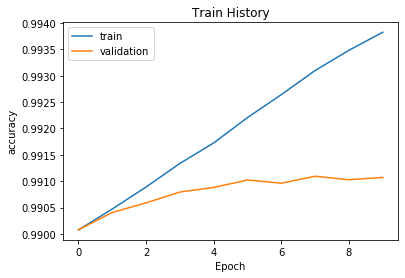

In [25]:
show_train_history(train_history, 'accuracy','val_accuracy')

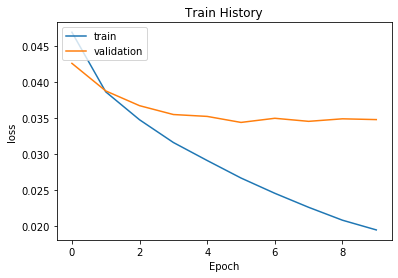

In [26]:
show_train_history(train_history, 'loss', 'val_loss')

In [27]:
model.compile(loss='binary_crossentropy', 
              optimizer='sgd', 
              metrics=['accuracy'])
train_history=model.fit(x_img_train_normalize, y_label_train_OneHot,
                        validation_split=0.2,
                        epochs=10, batch_size=20, verbose=1) 

Train on 40000 samples, validate on 10000 samples
Epoch 1/10
40000/40000 [==============================] - 81s 2ms/step - loss: 0.0152 - accuracy: 0.9950 - val_loss: 0.0345 - val_accuracy: 0.9911
Epoch 2/10
40000/40000 [==============================] - 93s 2ms/step - loss: 0.0149 - accuracy: 0.9951 - val_loss: 0.0344 - val_accuracy: 0.9911
Epoch 3/10
40000/40000 [==============================] - 108s 3ms/step - loss: 0.0148 - accuracy: 0.9951 - val_loss: 0.0344 - val_accuracy: 0.9911
Epoch 4/10
40000/40000 [==============================] - 110s 3ms/step - loss: 0.0147 - accuracy: 0.9951 - val_loss: 0.0344 - val_accuracy: 0.9911
Epoch 5/10
40000/40000 [==============================] - 111s 3ms/step - loss: 0.0146 - accuracy: 0.9952 - val_loss: 0.0343 - val_accuracy: 0.9911
Epoch 6/10
40000/40000 [==============================] - 110s 3ms/step - loss: 0.0146 - accuracy: 0.9952 - val_loss: 0.0343 - val_accuracy: 0.9912
Epoch 7/10
40000/40000 [==============================] - 81s 2m

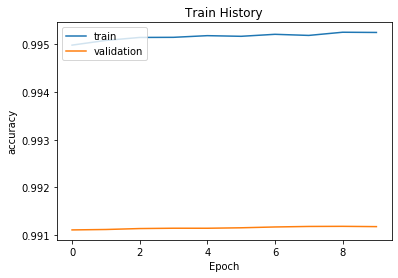

In [28]:
show_train_history(train_history, 'accuracy','val_accuracy')

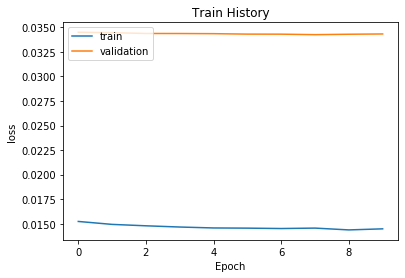

In [29]:
show_train_history(train_history, 'loss', 'val_loss')

### 結論 : (1) 以同樣的模型訓練, cifar100的準確率高於cifar10  (2) sgd 比 adam 較佳